In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv('TEST (1).csv')

In [2]:
df

,windspeed,rainfall24,rainfall6,rainfallaverage,area,yield,distance,areayieldrataio,percentageofarea,darea,yielda,fgprice,dctrice
0,0.000000,1.535972,3.032222,0.959983,2870.00,3.37,0.00000,851.632047,0.247070,709.091324,0.832626,20.79,1.113550e+07
1,0.000000,2.141071,3.942857,1.338170,491.00,4.36,0.00000,112.614679,0.244428,120.014173,1.065706,20.79,2.412279e+06
2,7.116629,5.809375,20.589580,3.630859,1330.88,4.42,385.79860,301.104072,0.312983,416.543187,1.383386,20.79,1.086828e+07
3,67.089467,3.908854,11.341670,2.443034,5767.00,4.65,26.26015,1240.215054,0.567852,3274.800267,2.640510,20.79,1.630911e+08
4,0.000000,0.805469,1.580208,0.503418,4710.00,4.14,0.00000,1137.681159,0.130472,614.521934,0.540153,20.79,6.260539e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39739,8.841748,2.292639,4.211667,1.432899,916.00,3.16,392.92250,289.873418,0.203710,186.598393,0.643724,20.79,2.265505e+06
39740,0.000000,0.030208,0.062500,0.018880,1046.00,3.07,0.00000,340.716612,0.556501,582.100434,1.708459,20.79,1.875686e+07
39741,8.575491,2.652500,5.460000,1.657812,753.00,4.52,291.88280,166.592920,0.161440,121.564092,0.729707,20.79,1.673060e+06
39742,9.387123,1.696181,3.348611,1.060113,99.00,1.93,496.10710,51.295337,0.154780,15.323183,0.298725,20.79,8.633316e+04


windspeed           0.187631
rainfall24          0.098306
rainfall6           0.127721
rainfallaverage     0.098306
area                0.267202
yield               0.748398
distance            0.157163
areayieldrataio     0.149554
percentageofarea    0.708972
darea               0.455975
fgprice            -0.011132
dctrice             0.511793
Name: yielda, dtype: float64


c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


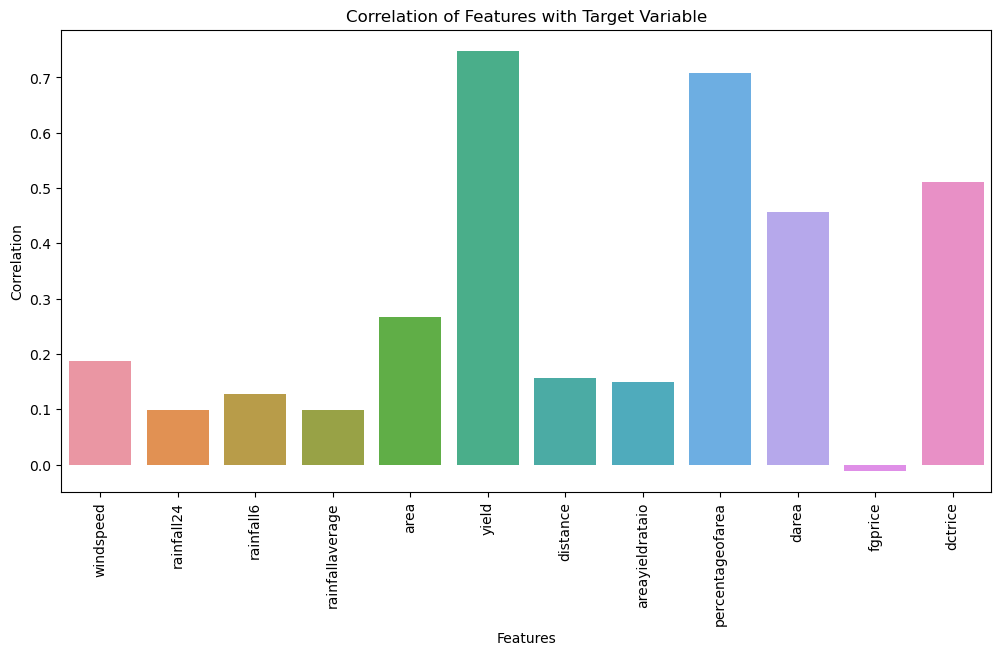

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target variable
correlation = df.corr()['yielda'].drop('yielda')

# Display the correlations
print(correlation)

# Plot the correlations
plt.figure(figsize=(12, 6))
sns.barplot(correlation.index, correlation.values)
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

In [5]:
import pandas as pd

correlation_matrix = df.corr()

# Display the correlation matrix in tabular form
print(correlation_matrix)

                  windspeed  rainfall24  rainfall6  rainfallaverage      area  \
windspeed          1.000000    0.343700   0.385849         0.343700  0.050195   
rainfall24         0.343700    1.000000   0.901206         1.000000  0.041834   
rainfall6          0.385849    0.901206   1.000000         0.901206  0.059019   
rainfallaverage    0.343700    1.000000   0.901206         1.000000  0.041834   
area               0.050195    0.041834   0.059019         0.041834  1.000000   
yield              0.127226    0.065524   0.086768         0.065524  0.347117   
distance           0.086782    0.125570   0.099359         0.125570  0.018181   
areayieldrataio    0.024816    0.035082   0.043171         0.035082  0.919958   
percentageofarea   0.176272    0.094566   0.117061         0.094566  0.081115   
darea              0.096300    0.074848   0.100049         0.074848  0.855471   
yielda             0.187631    0.098306   0.127721         0.098306  0.267202   
fgprice            0.017187 

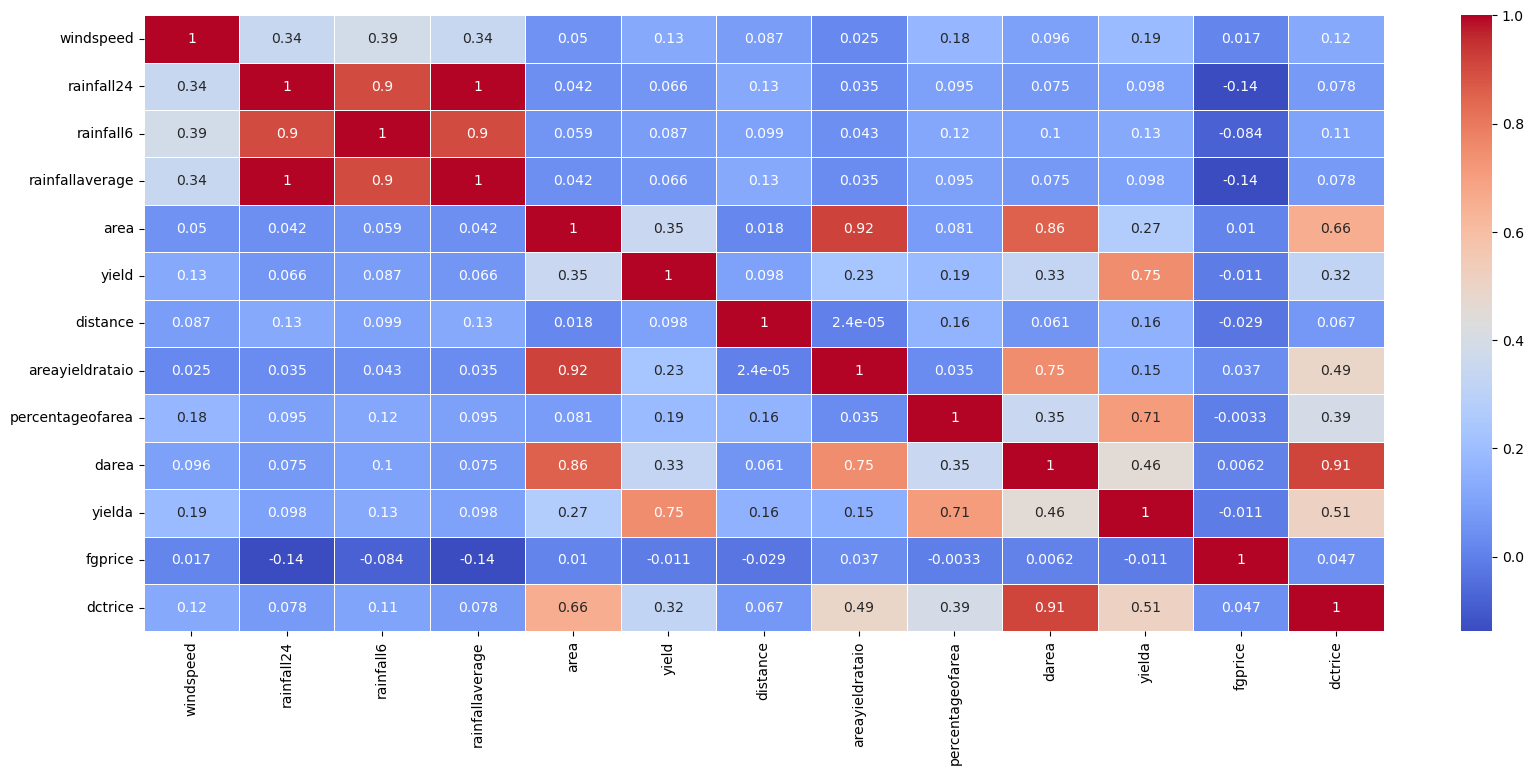

In [5]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [8]:
# Split the dataset into features and target variable
X = df.drop(['percentageofarea','yielda','darea','areayieldrataio','rainfallaverage','fgprice'], axis=1)
y = df.drop(['dctrice','percentageofarea','darea','windspeed','rainfall24','rainfall6','rainfallaverage','areayieldrataio','area', 'yield', 'fgprice','distance'], axis=1)

In [10]:
y

,yielda
0,0.832626
1,1.065706
2,1.383386
3,2.640510
4,0.540153
...,...
39739,0.643724
39740,1.708459
39741,0.729707
39742,0.298725


In [11]:
# Remove the rows with zero values from the training set and testing set
mask = X['windspeed'] != 0

# Apply the mask to X_train
X = X[mask]

# Apply the mask to y_train
y = y[mask]

In [13]:
# Remove the rows with zero values from the training set and testing set
mask =X['dctrice'] != 0

# Apply the mask to y_train
y = y[mask]

# Apply the mask to X_train
X = X[mask]

In [21]:
y

,darea
2,416.543187
3,3274.800267
5,18.574810
6,14.184494
7,452.347780
...,...
39729,28.768917
39736,79.952276
39739,186.598393
39741,121.564092


In [14]:
X.shape, y.shape

((15401, 7), (15401, 1))

In [15]:
# Data split into a training set and a temporary set using an 80-20 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split into a validation set and a test set using a 50-50 split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [16]:
X_val.shape, y_val.shape

((1540, 7), (1540, 1))

In [17]:
X_test.shape, y_test.shape

((1541, 7), (1541, 1))

In [18]:

X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [19]:
y_train.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yielda  12320 non-null  float64
dtypes: float64(1)
memory usage: 192.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   windspeed   12320 non-null  float64
 1   rainfall24  12320 non-null  float64
 2   rainfall6   12320 non-null  float64
 3   area        12320 non-null  float64
 4   yield       12320 non-null  float64
 5   distance    12320 non-null  float64
 6   dctrice     12320 non-null  float64
dtypes: float64(7)
memory usage: 770.0 KB


In [20]:
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
y_train = pd.DataFrame(y_train).apply(pd.to_numeric, errors='coerce')
y_test = pd.DataFrame(y_test).apply(pd.to_numeric, errors='coerce')

In [21]:
X_train.shape, y_train.shape


((12320, 7), (12320, 1))

In [22]:
X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [23]:
nan_rows = X_train[X_train.isna().any(axis=1)].index
X_train = X_train.drop(nan_rows)
y_train = y_train.drop(nan_rows)

print(np.where(pd.isnull(X_train)))

(array([], dtype=int64), array([], dtype=int64))


In [24]:
X_train.shape,y_train.shape

((12320, 7), (12320, 1))

In [25]:
nan_rows = X_test[X_test.isna().any(axis=1)].index
X_test = X_test.drop(nan_rows)
y_test = y_test.drop(nan_rows)

In [26]:
nan_rows = X_val[X_val.isna().any(axis=1)].index
X_val = X_val.drop(nan_rows)
y_val = y_val.drop(nan_rows)

In [27]:
X_test.shape, y_test.shape

((1541, 7), (1541, 1))

In [28]:
X_val.shape, y_val.shape

((1540, 7), (1540, 1))

In [29]:
X_test.shape, y_test.shape

((1541, 7), (1541, 1))

In [30]:

# Create a pipeline with StandardScaler and SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, RobustScaler, PowerTransformer, MaxAbsScaler


pipeline = make_pipeline(StandardScaler(), SVR(kernel='poly', C=2, degree=2, gamma='auto', coef0=2))

# Fitting the pipeline to the training set
pipeline.fit(X_train, y_train)


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr',
                 SVR(C=2, coef0=2, degree=2, gamma='auto', kernel='poly'))])

In [31]:

from sklearn.metrics import explained_variance_score


predictions = pipeline.predict(X_test)

# Evaluate the model
r2 = pipeline.score(X_test, y_test)
print(f'R-squared (Test): {r2}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (Test): {mae}')

predictionsVal = pipeline.predict(X_val)

# Evaluate the model


r2 = pipeline.score(X_val, y_val)
print(f'\nR-squared (Validation): {r2}')
maev = mean_absolute_error(y_val, predictionsVal)
print(f'Mean Absolute Error (Validation): {maev}')

# Assuming `predictions` are the predicted values from your model
explained_variance = explained_variance_score(y_test, predictions)
print(f'\nExplained Variance (Test): {explained_variance}')


explained_variance = explained_variance_score(y_val, predictionsVal)
print(f'Explained Variance (Validation): {explained_variance}')


# Calculate and print MAE in percentage points for test set
mae_percentage_test = (mae / y_test.values.mean()) * 100
print(f'\nMean Absolute Error (Test, p.p.): {mae_percentage_test}%')

# Calculate and print MAE in percentage points for test set
mae_percentage_val = (mae / y_val.values.mean()) * 100
print(f'Mean Absolute Error (Validation, p.p.): {mae_percentage_val}%')


R-squared (Test): 0.6908055081867419
Mean Absolute Error (Test): 0.31359052614196303

R-squared (Validation): 0.6486306345744347
Mean Absolute Error (Validation): 0.3153627256389509

Explained Variance (Test): 0.6924964844427167
Explained Variance (Validation): 0.6500916896315563

Mean Absolute Error (Test, p.p.): 26.213257233503047%
Mean Absolute Error (Validation, p.p.): 26.46917605012834%


In [32]:
print(['{:.2f}'.format(pred) for pred in predictionsVal])

['1.11', '1.56', '0.48', '0.36', '1.51', '0.51', '0.42', '1.59', '1.77', '0.48', '2.48', '2.47', '1.40', '0.83', '1.17', '0.60', '0.97', '1.91', '0.51', '1.34', '1.26', '0.96', '0.83', '0.56', '1.05', '1.63', '1.30', '0.44', '0.54', '0.98', '1.42', '0.81', '2.20', '0.60', '1.44', '1.90', '1.99', '2.29', '1.70', '1.36', '1.97', '1.48', '0.67', '0.90', '1.13', '0.29', '1.26', '0.96', '0.99', '0.55', '1.46', '1.18', '1.17', '0.48', '1.57', '1.00', '0.96', '0.83', '1.00', '3.68', '0.47', '0.11', '1.30', '1.09', '0.89', '0.95', '0.43', '1.19', '1.71', '0.90', '0.92', '0.72', '0.27', '1.29', '0.55', '0.45', '1.62', '1.70', '0.41', '0.62', '1.67', '0.34', '1.45', '2.19', '0.93', '1.34', '0.62', '1.24', '0.60', '1.04', '0.13', '1.33', '0.62', '0.47', '1.14', '1.01', '1.53', '1.95', '1.76', '2.47', '1.55', '0.71', '0.55', '1.09', '1.35', '1.36', '1.13', '0.45', '1.32', '1.66', '0.70', '0.99', '1.23', '0.32', '0.42', '1.03', '2.35', '0.56', '1.43', '1.37', '0.88', '0.57', '1.31', '0.53', '2.52',

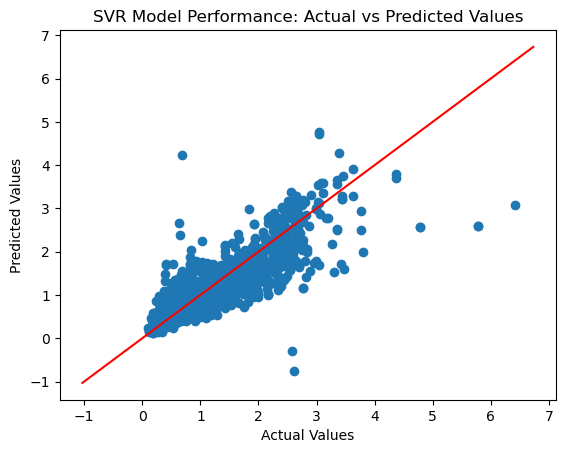

In [34]:
import matplotlib.pyplot as plt

# Make predictions
predictions = pipeline.predict(X_test)

# Create a scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Model Performance: Actual vs Predicted Values')

limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

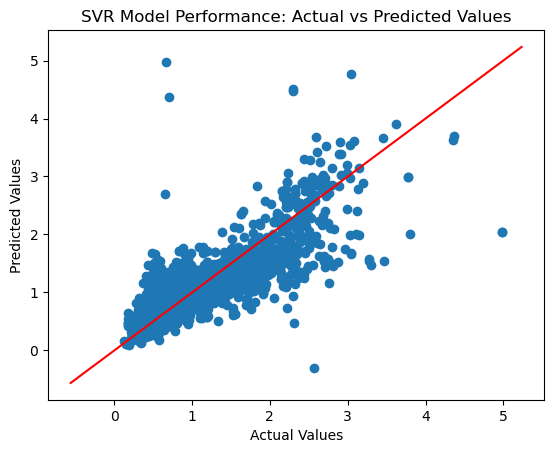

In [35]:
import numpy as np

# Make predictions
predictionsVal = pipeline.predict(X_val)

# Create a scatter plot
plt.scatter(y_val, predictionsVal)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Model Performance: Actual vs Predicted Values')

limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

In [37]:
import pandas as pd
import numpy as np

# Ensure y_test and predictions are 1-dimensional
y_test = np.ravel(y_test)
predictions = np.ravel(predictions)

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': ['{:.2f}'.format(pred) for pred in predictions]})

# Display the DataFrame
print(df.head(20))

      Actual Predicted
0   1.416425      2.15
1   1.058138      0.96
2   0.662269      0.91
3   0.317383      0.38
4   0.417249      0.71
5   0.383913      0.88
6   1.088020      1.03
7   0.343554      0.58
8   2.112921      2.28
9   0.305945      0.91
10  0.612818      0.72
11  0.330913      0.68
12  1.666768      1.42
13  0.567496      0.64
14  1.647149      1.60
15  2.304999      1.77
16  2.109278      1.34
17  0.407646      0.44
18  1.769177      1.90
19  0.760900      0.62


In [38]:

from joblib import dump

dump(pipeline, 'SVR-DYIELD.joblib')


['SVR-DYIELD.joblib']